In [1]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [2]:
from utils.plot_utils import plot_image_grid

Using device: mps
LOADED METADATA HAS LENGTH 10015
OFFLINE INIT METADATA
---TRAIN---: 7210 entries
---VAL---: 1803 entries
---TEST---: 1002 entries
Using device: mps


/Users/dov/miniconda3/envs/aml_project/lib/python3.10/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Using device: mps
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4827 images.
--Data Balance-- The second common class is 2 with 802 images with a difference of 4025 images from the most common class.
--Data Balance (Downsampling)-- Keeping 4827 from 0 class..
--Data Balance (Downsampling)-- 0 now has 4827 images
--Data Balance (Oversampling)-- Adding 4036 from 1 class..
--Data Balance (Oversampling)-- Adding 4592 from 3 class..
--Data Balance (Oversampling)-- Adding 4025 from 2 class..
--Data Balance (Oversampling)-- Adding 4457 from 4 class..
--Data Balance (Oversampling)-- Adding 4744 from 5 class..
--Data Balance (Oversampling)-- Adding 4725 from 6 class..


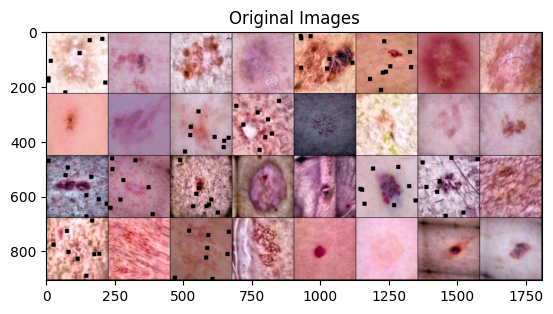

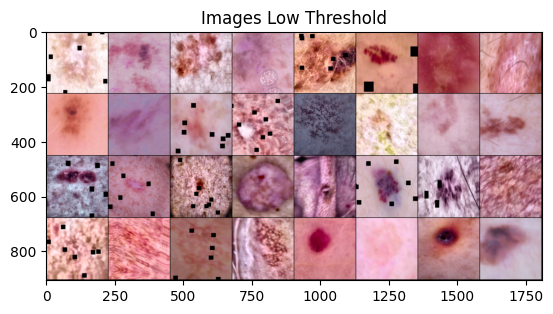

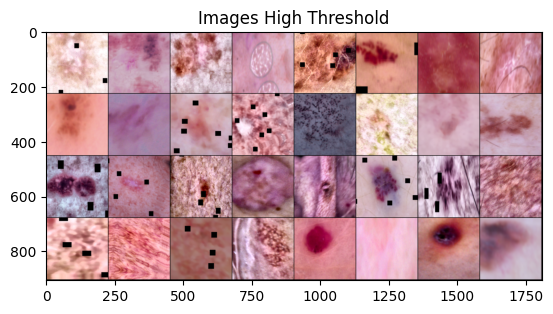

Using device: mps


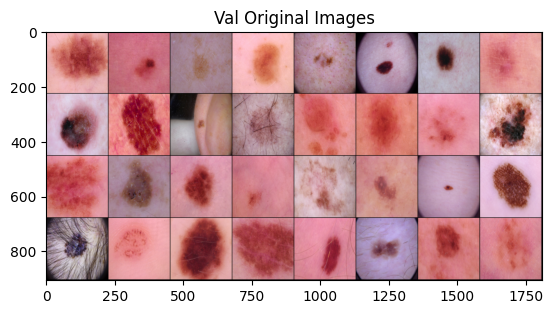

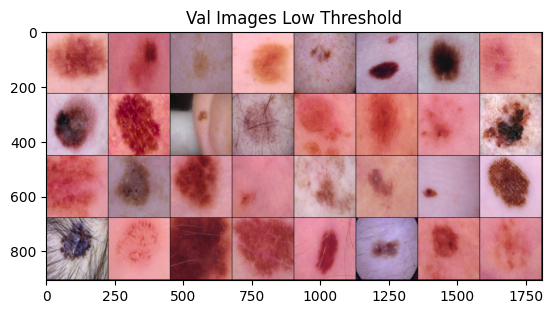

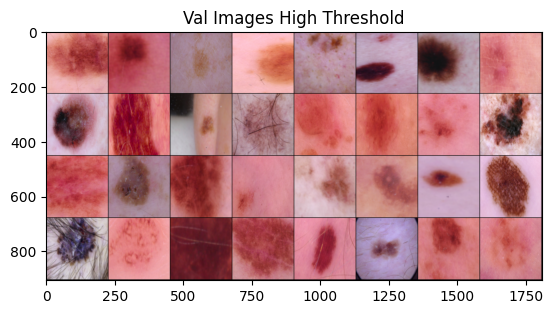

In [4]:
from dataloaders.ImagesAndSegmentationDataLoader import ImagesAndSegmentationDataLoader
from dataloaders.MSLANetDataLoader import MSLANetDataLoader
from shared.constants import IMAGENET_STATISTICS

dataloader = MSLANetDataLoader(
    dynamic_load=True,
    load_synthetic=True,
    normalize=False,
    normalization_statistics=IMAGENET_STATISTICS,
    batch_size=32,
    upscale_train=True,
    online_gradcam=False,
)
train_dataloader = dataloader.get_train_dataloder()
batch = next(iter(train_dataloader))
(image_ori, image_low, image_high), labels = batch
plot_image_grid(image_ori, "Original Images")
plot_image_grid(image_low, "Images Low Threshold")
plot_image_grid(image_high, "Images High Threshold")
val_dataloader = dataloader.get_val_dataloader()
batch = next(iter(val_dataloader))
(image_ori, image_low, image_high), labels = batch
plot_image_grid(image_ori, "Val Original Images")
plot_image_grid(image_low, "Val Images Low Threshold")
plot_image_grid(image_high, "Val Images High Threshold")